<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/statics/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단측 검정 문제

어느 도넛 회사에서 새로 출시된 도넛의 평균 칼로리가 100kcal보다 작은가에 대해 알아보고자 합니다.

해당 도넛의 칼로리가 정규분포를 따르며, 칼로리의 모 표준편차는 10이라고 가정하겠습니다. 검정을 위해 64개의 표본을 추출했더니 표본들의 칼로리 평균이 95kcal이었습니다. 유의수준 5%에서 검정해보겠습니다.

$Z = \frac{\bar{X}-μ}{σ/\sqrt n}$

$\bar{X} : 표본평균$
$μ : 모평균$

$σ : 모 표준편차$
$n : 샘플수$


In [129]:
sample_mean = 95        # 표본 평균 값
population_mean = 100   # 모집단 평균 값
population_stddev = 10  # 모집단 표준편차 값
sample_size = 64        # 표본 크기 값

# Z-통계량 계산
Z = (sample_mean - population_mean) / (population_stddev / np.sqrt(sample_size))
Z

-4.0

In [132]:
alpha = 0.05            # 유의수준
Z_alpha = 1.645         # 임계값

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [136]:
def left_testing(z_value, significance_level):

    if significance_level in [0.01, 0.05, 0.001]:
        print('y')
    else:
        print('n')

In [137]:
left_testing(-4, 0.05)

y


In [142]:
def left_testing(Z, significance_level):

    if significance_level in [0.01, 0.05, 0.001]:

        x = np.linspace(-5, 5, 1000000)
        pdf = norm.pdf(x, loc=0, scale=1)
        if significance_level == 0.01:
            z_value = 2.33
            # 임계값보다 작은 왼쪽 영역을 빨간색(기각역)으로, 오른쪽 영역을 파란색(채택역)으로 색칠
            plt.plot(x, pdf, color='blue')
            plt.fill_between(x, pdf, where=(x < -z_value), color='red', alpha=0.5, label=f'Z < -{z_value} (1%)')
            plt.fill_between(x, pdf, where=(x >= -z_value), color='blue', alpha=0.5, label=f'Z >= -{z_value} (99%)')
        elif significance_level == 0.05:
            z_value = 1.645
            # 임계값보다 작은 왼쪽 영역을 빨간색(기각역)으로, 오른쪽 영역을 파란색(채택역)으로 색칠
            plt.plot(x, pdf, color='blue')
            plt.fill_between(x, pdf, where=(x < -z_value), color='red', alpha=0.5, label=f'Z < -{z_value} (5%)')
            plt.fill_between(x, pdf, where=(x >= -z_value), color='blue', alpha=0.5, label=f'Z >= -{z_value} (95%)')
        else:
            z_value = 3.09
            # 임계값보다 작은 왼쪽 영역을 빨간색(기각역)으로, 오른쪽 영역을 파란색(채택역)으로 색칠
            plt.plot(x, pdf, color='blue')
            plt.fill_between(x, pdf, where=(x < -z_value), color='red', alpha=0.5, label=f'Z < -{z_value} (0.1%)')
            plt.fill_between(x, pdf, where=(x >= -z_value), color='blue', alpha=0.5, label=f'Z >= -{z_value} (99.9%)')

        # 검정통계량에 초록색 점 찍기
        plt.scatter(Z, 0, color='green', marker='o', label='test statistic')

        plt.xlabel('Z')
        plt.legend(loc='upper left')
        plt.show()
    else:
        print('잘못된 유의수준입니다.')

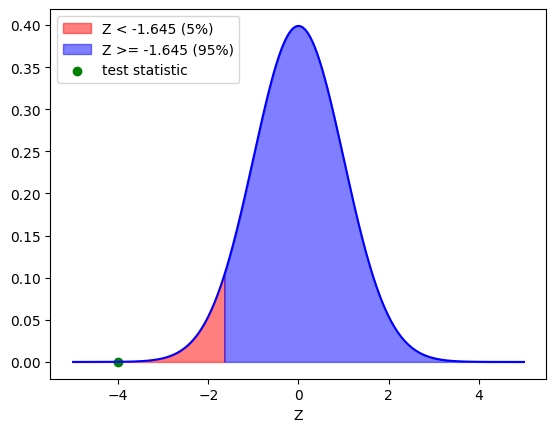

In [143]:
left_testing(-4, 0.05)

검정통계량이 기각역에 있기에 귀무가설을 기각한다.

# 큰 수의 법칙

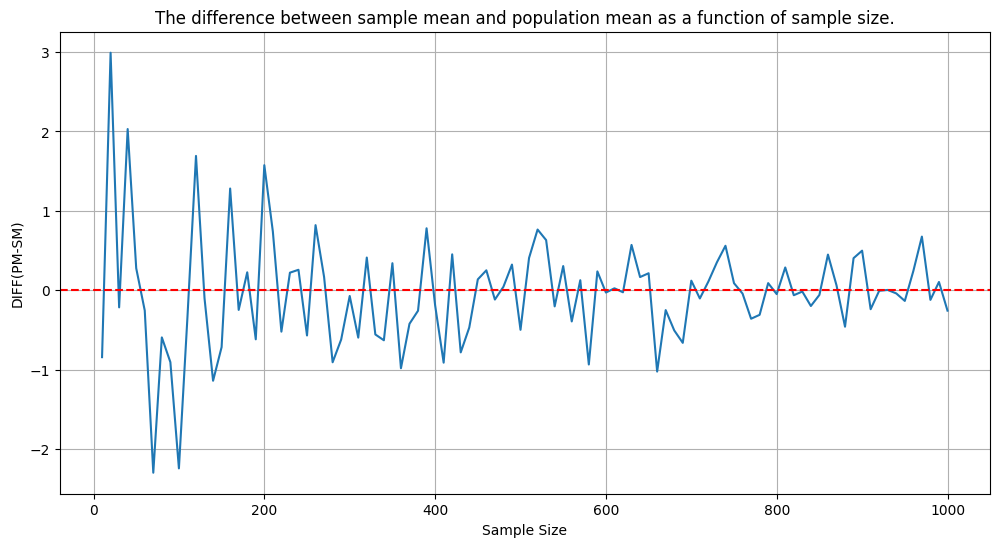

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

sample_sizes = list(range(10, 1001, 10))

diff_list = []
for i in sample_sizes:
    pop = np.random.normal(100, 10, i)
    diff = 100 - np.mean(pop)
    diff_list.append(diff)

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, diff_list, linestyle='-')
plt.title('The difference between sample mean and population mean as a function of sample size.')
plt.xlabel('Sample Size')
plt.ylabel('DIFF(PM-SM)')
plt.grid(True)

plt.axhline(y=0, color='red', linestyle='--')

plt.show()

# 중심극한정리

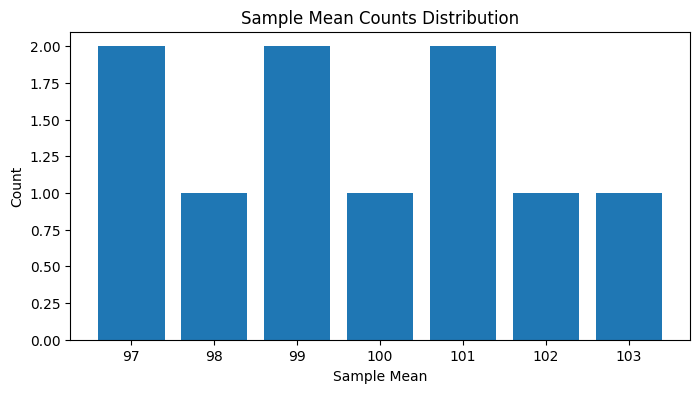

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

mean_list = []

for i in range(1, 11):                              # 10번 시행
    pop = np.random.normal(100, 10, 30)
    mean = np.mean(pop)
    mean_list.append(int(mean))

count_dict = dict(Counter(mean_list))

x_values = list(count_dict.keys())
y_values = list(count_dict.values())

plt.figure(figsize=(8, 4))
plt.bar(x_values, y_values)
plt.title('Sample Mean Counts Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()

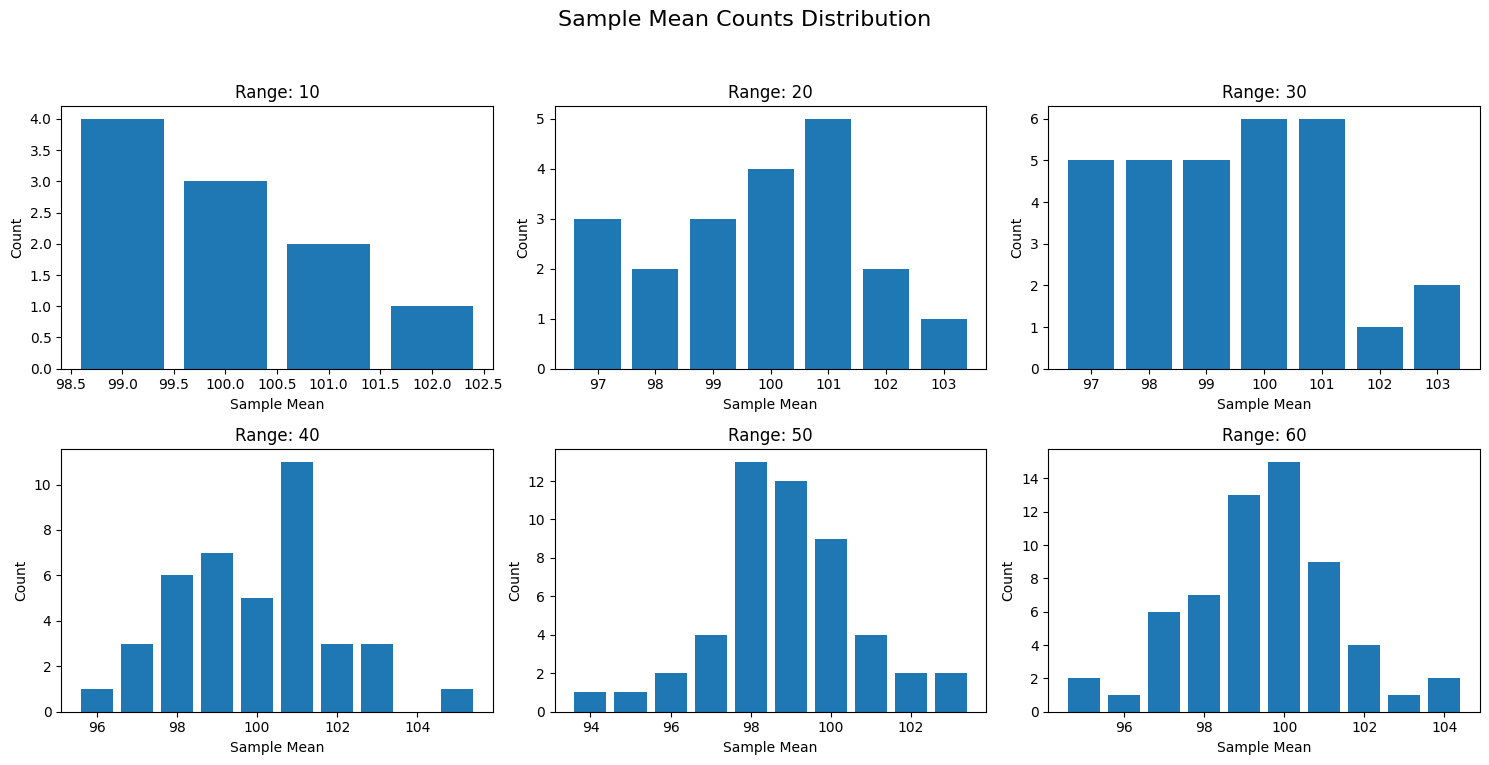

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Sample Mean Counts Distribution', fontsize=16)

count_dicts = []

for start in [11, 21, 31, 41, 51, 61]:                          # 각각 10번, 20번, ..., 60번 시행
    mean_list = []
    for i in range(1, start):
        pop = np.random.normal(100, 10, 30)
        mean = int(np.mean(pop))
        mean_list.append(mean)

    count_dict = dict(Counter(mean_list))
    count_dicts.append(count_dict)

for i, count_dict in enumerate(count_dicts):
    row, col = i // 3, i % 3
    ax = axs[row, col]

    x_values = list(count_dict.keys())
    y_values = list(count_dict.values())

    ax.bar(x_values, y_values)
    ax.set_title(f'Range: {(i+1)*10}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

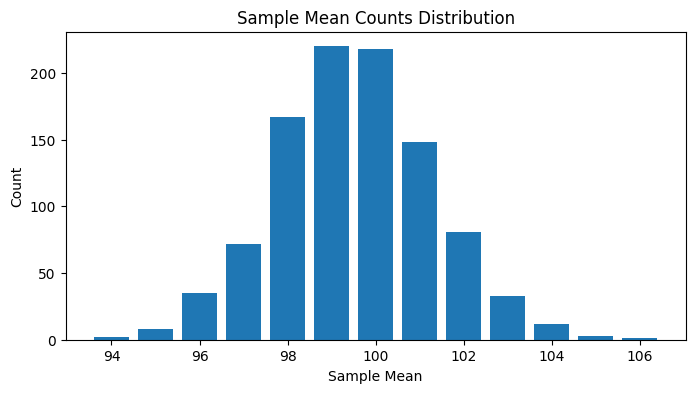

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

mean_list = []

for i in range(1, 1001):                                # 1,000번 시행
    pop = np.random.normal(100, 10, 30)
    mean = np.mean(pop)
    mean_list.append(int(mean))

count_dict = dict(Counter(mean_list))

x_values = list(count_dict.keys())
y_values = list(count_dict.values())

plt.figure(figsize=(8, 4))
plt.bar(x_values, y_values)
plt.title('Sample Mean Counts Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Count')
plt.show()